1. хитмап до 91 г
2. хитмап после 91 - посмотреть различия по егэ и огэ - посмотреть сколько вошло сколько нет
3. хитмап по всему
4. stacked bar charts

In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 1. хитмап до 91 г

In [73]:
df_del = pd.read_csv('del_s4.csv')

df_del['all'] = df_del['author'] + ' ' + df_del['title']
pivot_df1 = df_del.pivot_table(index='all', columns='year', values='id', aggfunc='count').reset_index()
pivot_df1

year,all,1919,1922,1932,1933,1934,1938,1940,1941,1942,...,1980,1981,1982,1983,1984,1985,1986,1987,1988,1991
0,Абашидзе И.В. Избранные стихотворения,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Абашидзе И.В. что-то,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN
2,Абрамов Ф.А. Две зимы и три лета,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN
3,Абрамов Ф.А. Поездка в прошлое,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4,Абрамов Ф.А. Пряслины,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1614,народ Устное творчество позднейшего происхожде...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1615,народ Федосова И.А.,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1616,"народ Что далече, далече во чистом поле…",NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1617,народ Шемякин Суд повесть,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
df_del['all'] = df_del['author'] + ' ' + df_del['title']
df_del['all']

0                          Андреев Л.Н. Жили-были
1                               Андреев Л.Н. Иуда
2          Андреев Л.Н. Рассказ о семи повешенных
3                            Бальмонт К.Д. что-то
4                              Брюсов В.Я. что-то
                          ...                    
9332                         Шиллер Ф. Разбойники
9333                   Эсхил Прометей прикованный
9334    Достоевский Ф.М. Преступление и наказание
9335               Куприн А.И. Гранатовый браслет
9336                    Некрасов Н.А. Коробейники
Name: all, Length: 9337, dtype: object

In [75]:
pivot_df1.columns

Index(['all',  1919,  1922,  1932,  1933,  1934,  1938,  1940,  1941,  1942,
        1944,  1946,  1947,  1948,  1949,  1950,  1951,  1954,  1956,  1957,
        1958,  1959,  1960,  1961,  1964,  1965,  1973,  1974,  1975,  1976,
        1977,  1978,  1979,  1980,  1981,  1982,  1983,  1984,  1985,  1986,
        1987,  1988,  1991],
      dtype='object', name='year')

In [76]:
for i in range(1919, 1992):
    if i not in pivot_df1.columns:
        pivot_df1[i] = 0

In [77]:
pivot_df1 = pivot_df1.set_index('all')
sorted_pivot_df = pivot_df1.reindex(sorted(pivot_df1.columns), axis=1)

In [78]:
for i in sorted_pivot_df.columns:
    sorted_pivot_df[i] = sorted_pivot_df[i].apply(lambda x: 1 if x > 0 else 0)
data = {} 
for i in sorted_pivot_df.columns:
    data[i] = []
    for j in sorted_pivot_df.columns:
        data[i].append(((sorted_pivot_df[i] - sorted_pivot_df[j])**2).sum()/len(sorted_pivot_df[1919]))
dataf1 = pd.DataFrame(data, index = sorted_pivot_df.columns)

In [79]:
dataf1

,1919,1920,1921,1922,1923,1924,1925,1926,1927,1928,...,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991
year,,,,,,,,,,,,,,,,,,,,,
1919,0.000000,0.098826,0.098826,0.137739,0.098826,0.098826,0.098826,0.098826,0.098826,0.098826,...,0.239654,0.239036,0.239654,0.238419,0.237183,0.238419,0.238419,0.098826,0.098826,0.365658
1920,0.098826,0.000000,0.000000,0.117974,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.174182,0.173564,0.174182,0.171711,0.171711,0.171711,0.171711,0.000000,0.000000,0.319951
1921,0.098826,0.000000,0.000000,0.117974,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.174182,0.173564,0.174182,0.171711,0.171711,0.171711,0.171711,0.000000,0.000000,0.319951
1922,0.137739,0.117974,0.117974,0.000000,0.117974,0.117974,0.117974,0.117974,0.117974,0.117974,...,0.263743,0.263125,0.263743,0.263743,0.263743,0.263743,0.263743,0.117974,0.117974,0.390982
1923,0.098826,0.000000,0.000000,0.117974,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.174182,0.173564,0.174182,0.171711,0.171711,0.171711,0.171711,0.000000,0.000000,0.319951
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1987,0.238419,0.171711,0.171711,0.263743,0.171711,0.171711,0.171711,0.171711,0.171711,0.171711,...,0.012353,0.014206,0.013589,0.001235,0.002471,0.000000,0.000000,0.171711,0.171711,0.368128
1988,0.238419,0.171711,0.171711,0.263743,0.171711,0.171711,0.171711,0.171711,0.171711,0.171711,...,0.012353,0.014206,0.013589,0.001235,0.002471,0.000000,0.000000,0.171711,0.171711,0.368128
1989,0.098826,0.000000,0.000000,0.117974,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.174182,0.173564,0.174182,0.171711,0.171711,0.171711,0.171711,0.000000,0.000000,0.319951


In [80]:
nach = [1920, 1923, 1935, 1939, 1943, 1945, 1952, 1955, 1962, 1966, 1989]
end = [1922, 1932, 1938, 1940, 1944, 1946, 1954, 1956, 1964, 1973, 1991]

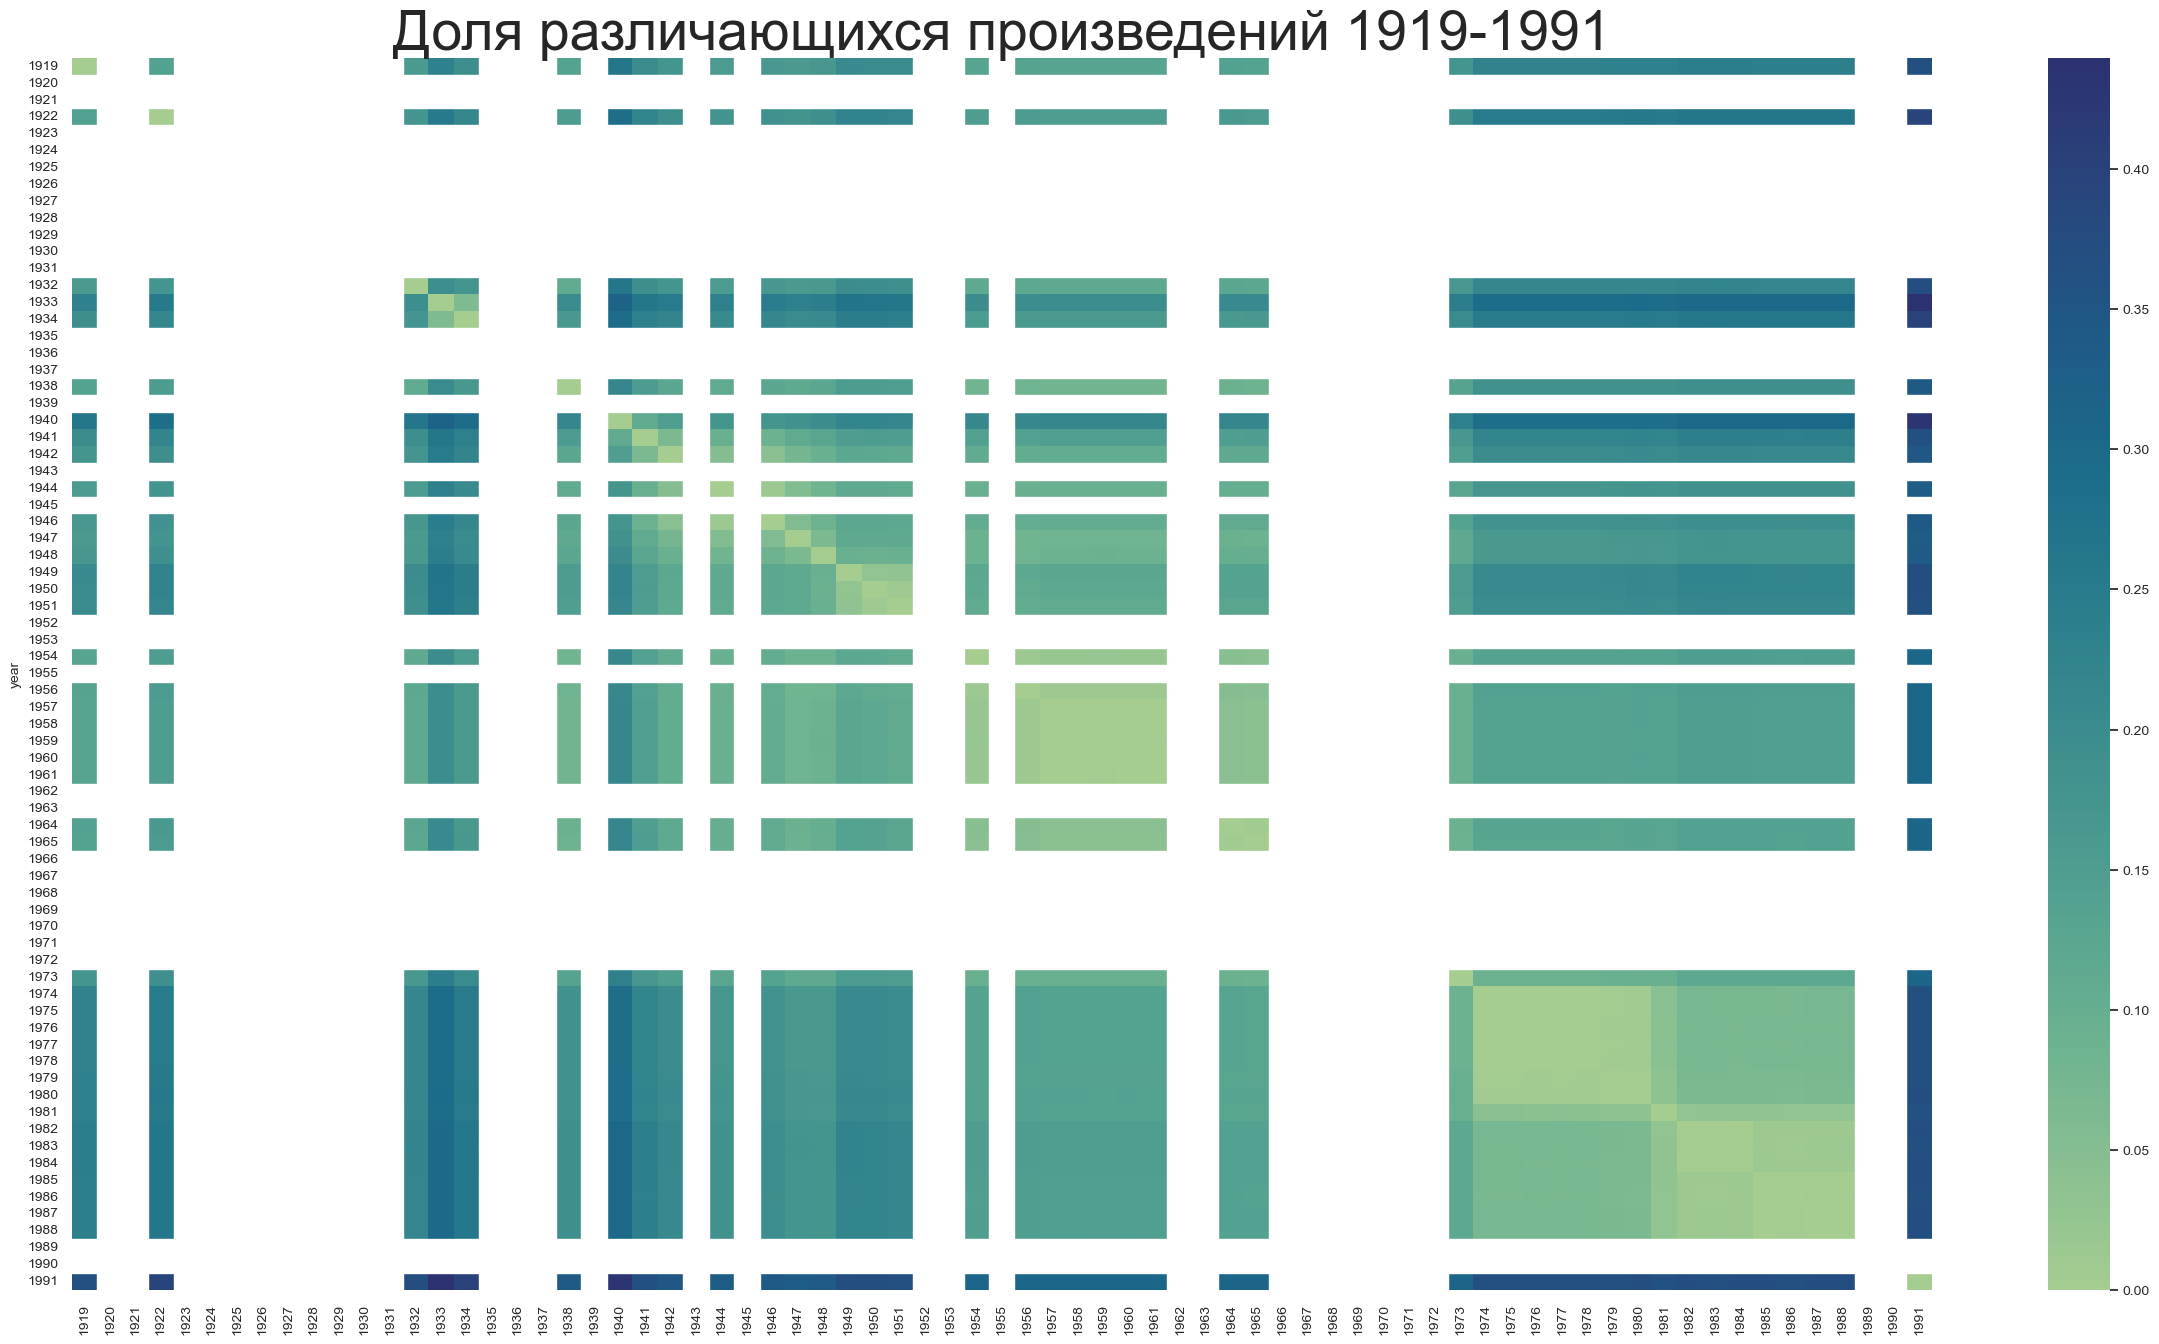

In [163]:

plt.rcParams['svg.fonttype'] = 'none'
plt.figure(figsize=(30, 16))

plt.title('Доля различающихся произведений 1919-1991', fontsize = 40)
cmap = sns.color_palette("crest", as_cmap=True)
plot = sns.heatmap(dataf1, cmap = cmap)

ax = plot.axes

for i in range(len(nach)):
    x_start = nach[i] - 1919  
    x_end = end[i] - 1919    
    ax.axvspan(x_start, x_end, color='white', alpha=1)

for i in range(len(nach)):
    y_start = nach[i] - 1919  
    y_end = end[i] - 1919    
    ax.axhspan(y_start, y_end, color='white', alpha=1)

fig = plot.get_figure()
fig.savefig('1919-1991.svg', format='svg')

## 2. хитмап после 91 г

In [53]:
after = pd.read_excel('Литературный канон.xlsx', sheet_name = 'Curricula 98-2022 (без программ')

In [54]:
for i in range(0, len(after['author']) + 1):
    if after['author'].isna()[i] == True:
        after['author'][i] = after['notes'][i]
        if after['notes'].isna()[i] == True:
            after['author'][i] = after['source_issue'][i]

C:\Users\Карина\AppData\Local\Temp\ipykernel_15976\313114215.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  after['author'][i] = after['notes'][i]
C:\Users\Карина\AppData\Local\Temp\ipykernel_15976\313114215.py:3: SettingWithCopyWarning

C:\Users\Карина\AppData\Local\Temp\ipykernel_15976\313114215.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  after['author'][i] = after['notes'][i]
C:\Users\Карина\AppData\Local\Temp\ipykernel_15976\313114215.py:3: SettingWithCopyWarning

C:\Users\Карина\AppData\Local\Temp\ipykernel_15976\313114215.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  after['author'][i] = after['notes'][i]
C:\Users\Карина\AppData\Local\Temp\ipykernel_15976\313114215.py:3: SettingWithCopyWarning

C:\Users\Карина\AppData\Local\Temp\ipykernel_15976\313114215.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  after['author'][i] = after['notes'][i]
C:\Users\Карина\AppData\Local\Temp\ipykernel_15976\313114215.py:3: SettingWithCopyWarning

C:\Users\Карина\AppData\Local\Temp\ipykernel_15976\313114215.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  after['author'][i] = after['notes'][i]
C:\Users\Карина\AppData\Local\Temp\ipykernel_15976\313114215.py:3: SettingWithCopyWarning

C:\Users\Карина\AppData\Local\Temp\ipykernel_15976\313114215.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  after['author'][i] = after['notes'][i]
C:\Users\Карина\AppData\Local\Temp\ipykernel_15976\313114215.py:3: SettingWithCopyWarning

C:\Users\Карина\AppData\Local\Temp\ipykernel_15976\313114215.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  after['author'][i] = after['notes'][i]
C:\Users\Карина\AppData\Local\Temp\ipykernel_15976\313114215.py:3: SettingWithCopyWarning

KeyError: 3910

In [55]:
after['author'] = after['author'].astype(str)
after['title'] = after['title'].astype(str)

In [56]:
after['all'] = after['author'] + ' ' + after['title']
after['all']

0       Произведения писателей и поэтов второй половин...
1       Русские народные сказки, народные песни, посло...
2       Русские народные песни, загадки, пословицы, по...
3       По 1 русской народной сказке (волшебная, бытов...
4       2–3 произведения зарубежного фольклора (легенд...
                              ...                        
3905                                  Толстой Л.Н. Юность
3906                                   Платонов А.П. Юшка
3907                                   Платонов А.П. Юшка
3908                                   Платонов А.П. Юшка
3909          Рубина Д.И. Я и ты под персиковыми облаками
Name: all, Length: 3910, dtype: object

In [57]:
pivot_df_after = after.pivot_table(index='all', columns='source_year', values='title', aggfunc='count').reset_index()
pivot_df_after

source_year,all,1998,1999,2004,2015,2016,2020,2021,2022
0,1 поэтическое произведение литературы последне...,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN
1,1 прозаическое произведение литературы последн...,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN
2,1 произведение героического эпоса народов Росс...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3,1 произведение героического эпоса народов Росс...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,1 произведение героического эпоса народов Росс...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1295,Эрдман Н.Р. Самоубийца,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
1296,Языков Н.М. Произведения по выбору,NaN,NaN,1.0,1.0,NaN,1.0,1.0,2.0
1297,Яковлев Ю.Я. Девочки с Васильевского острова,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0
1298,Яковлев Ю.Я. Произведения по выбору,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0


In [59]:
pivot_df_after = pivot_df_after.loc[pivot_df_after['all'] != 'др. Произведения по выбору']
pivot_df_after

source_year,all,1998,1999,2004,2015,2016,2020,2021,2022
0,1 поэтическое произведение литературы последне...,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN
1,1 прозаическое произведение литературы последн...,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN
2,1 произведение героического эпоса народов Росс...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3,1 произведение героического эпоса народов Росс...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,1 произведение героического эпоса народов Росс...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1294,Энде М. Произведения по выбору,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN
1295,Эрдман Н.Р. Самоубийца,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
1296,Языков Н.М. Произведения по выбору,NaN,NaN,1.0,1.0,NaN,1.0,1.0,2.0
1297,Яковлев Ю.Я. Девочки с Васильевского острова,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0


In [60]:
pivot_df_after.columns

Index(['all', 1998, 1999, 2004, 2015, 2016, 2020, 2021, 2022], dtype='object', name='source_year')

In [61]:
for i in range(1998, 2022):
    if i not in pivot_df_after.columns:
        pivot_df_after[i] = pivot_df_after[i-1]

In [62]:
pivot_df_after

source_year,all,1998,1999,2004,2015,2016,2020,2021,2022,2000,...,2008,2009,2010,2011,2012,2013,2014,2017,2018,2019
0,1 поэтическое произведение литературы последне...,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN
1,1 прозаическое произведение литературы последн...,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN
2,1 произведение героического эпоса народов Росс...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN
3,1 произведение героического эпоса народов Росс...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN
4,1 произведение героического эпоса народов Росс...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1294,Энде М. Произведения по выбору,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1295,Эрдман Н.Р. Самоубийца,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0
1296,Языков Н.М. Произведения по выбору,NaN,NaN,1.0,1.0,NaN,1.0,1.0,2.0,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN
1297,Яковлев Ю.Я. Девочки с Васильевского острова,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
pivot_df_after = pivot_df_after.set_index('all')
sorted_pivot_df_after = pivot_df_after.reindex(sorted(pivot_df_after.columns), axis=1)

In [64]:
sorted_pivot_df_after

source_year,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
all,,,,,,,,,,,,,,,,,,,,,
1 поэтическое произведение литературы последнего десятилетия по выбору Произведения по выбору,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,2.0,...,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1 прозаическое произведение литературы последнего десятилетия по выбору Произведения по выбору,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,2.0,...,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1 произведение героического эпоса народов России во фрагментах по выбору (предлагаемый список произведений является примерным и может варьироваться в разных субъектах Российской Федерации) Гэсэр,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1 произведение героического эпоса народов России во фрагментах по выбору (предлагаемый список произведений является примерным и может варьироваться в разных субъектах Российской Федерации) Джангар,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1 произведение героического эпоса народов России во фрагментах по выбору (предлагаемый список произведений является примерным и может варьироваться в разных субъектах Российской Федерации) Калевала,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Энде М. Произведения по выбору,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN
Эрдман Н.Р. Самоубийца,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN,NaN
Языков Н.М. Произведения по выбору,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,NaN,NaN,NaN,NaN,1.0,1.0,2.0


## ЕГЭ

In [96]:
ege = pd.read_excel('Литературный канон.xlsx', sheet_name = 'Curricula 98-2022 (для 2007-202')

In [102]:
len(ege['author'])

7851

In [103]:
for i in range(0, len(ege['author'])):
    if ege['author'].isna()[i] == True:
        ege['author'][i] = ege['notes'][i]
        if ege['notes'].isna()[i] == True:
            ege['author'][i] = ege['source_issue'][i]
ege['author'] = ege['author'].astype(str)
ege['title'] = ege['title'].astype(str)

C:\Users\Карина\AppData\Local\Temp\ipykernel_14076\100659391.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  ege['author'][i] = ege['notes'][i]
C:\Users\Карина\AppData\Local\Temp\ipykernel_14076\100659391.py:3: SettingWithCopyWarning: 
A

In [104]:
ege['all'] = ege['author'] + ' ' + ege['title']
ege['all']

0       Произведения писателей и поэтов второй половин...
1       Русские народные сказки, народные песни, посло...
2       Русские народные песни, загадки, пословицы, по...
3       По 1 русской народной сказке (волшебная, бытов...
4       По 1 русской народной сказке (волшебная, бытов...
                              ...                        
7846                                     Пьецух В.А. Шкаф
7847                                     Пьецух В.А. Шкаф
7848                                  Толстой Л.Н. Юность
7849          Рубина Д.И. Я и ты под персиковыми облаками
7850          Рубина Д.И. Я и ты под персиковыми облаками
Name: all, Length: 7851, dtype: object

pivot после + пивот егэ - сравнить хитмап
заполнить пропуски у после

In [117]:
pivot_df_ege = ege.pivot_table(index='all', columns='source_year', values='title', aggfunc='count').reset_index()
pivot_df_ege = pivot_df_ege.loc[pivot_df_ege['all'] != 'др. Произведения по выбору']

In [120]:
for i in range(1998, 2022):
    if i not in pivot_df_ege.columns:
        pivot_df_ege[i] = pivot_df_ege[i-1]

In [121]:
pivot_df_ege = pivot_df_ege.set_index('all')
sorted_pivot_df_ege = pivot_df_ege.reindex(sorted(pivot_df_ege.columns), axis=1)

In [125]:
for year in range(1998, 2022):
    print(year)

1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021


In [126]:
diff = pd.DataFrame()

diff

""


In [147]:
diff = {}

for year in range(1998, 2023):
    ege_1 = ege[ege['source_year'] == year]
    after_1 = after[after['source_year'] == year]
    diff[year] = []
    for i in ege_1.index:
        if ege_1['all'][i] not in after_1['all']:
            if ege_1['title'][i] == 'Произведения по выбору' and ege_1['author'][i] in after_1['author']:
                pass
            else:
                diff[year].append(ege['all'][i])

ЭТО ЧЗХ

In [244]:
'Цветаева М.И. Книги в красном переплете' in after_1['all']

False

In [250]:
after_1[after_1['author'] == 'Цветаева М.И.'].loc[582]['all'] == 'Цветаева М.И. Книги в красном переплете'

True

In [205]:
diff_df = pd.DataFrame(list(diff.items()))
diff_df.set_index(0, inplace = True)

In [206]:
number = {}

for year in diff_df.index:
    a = set(diff_df[1][year])
    number[year] = len(a)

In [211]:
for i in(2000, 2001, 2002, 2003):
    number[i] = 186
number[2005] = 347

In [223]:
full = {}
for year in sorted_pivot_df_ege.columns:
    full[year] = sorted_pivot_df_ege[year].sum()

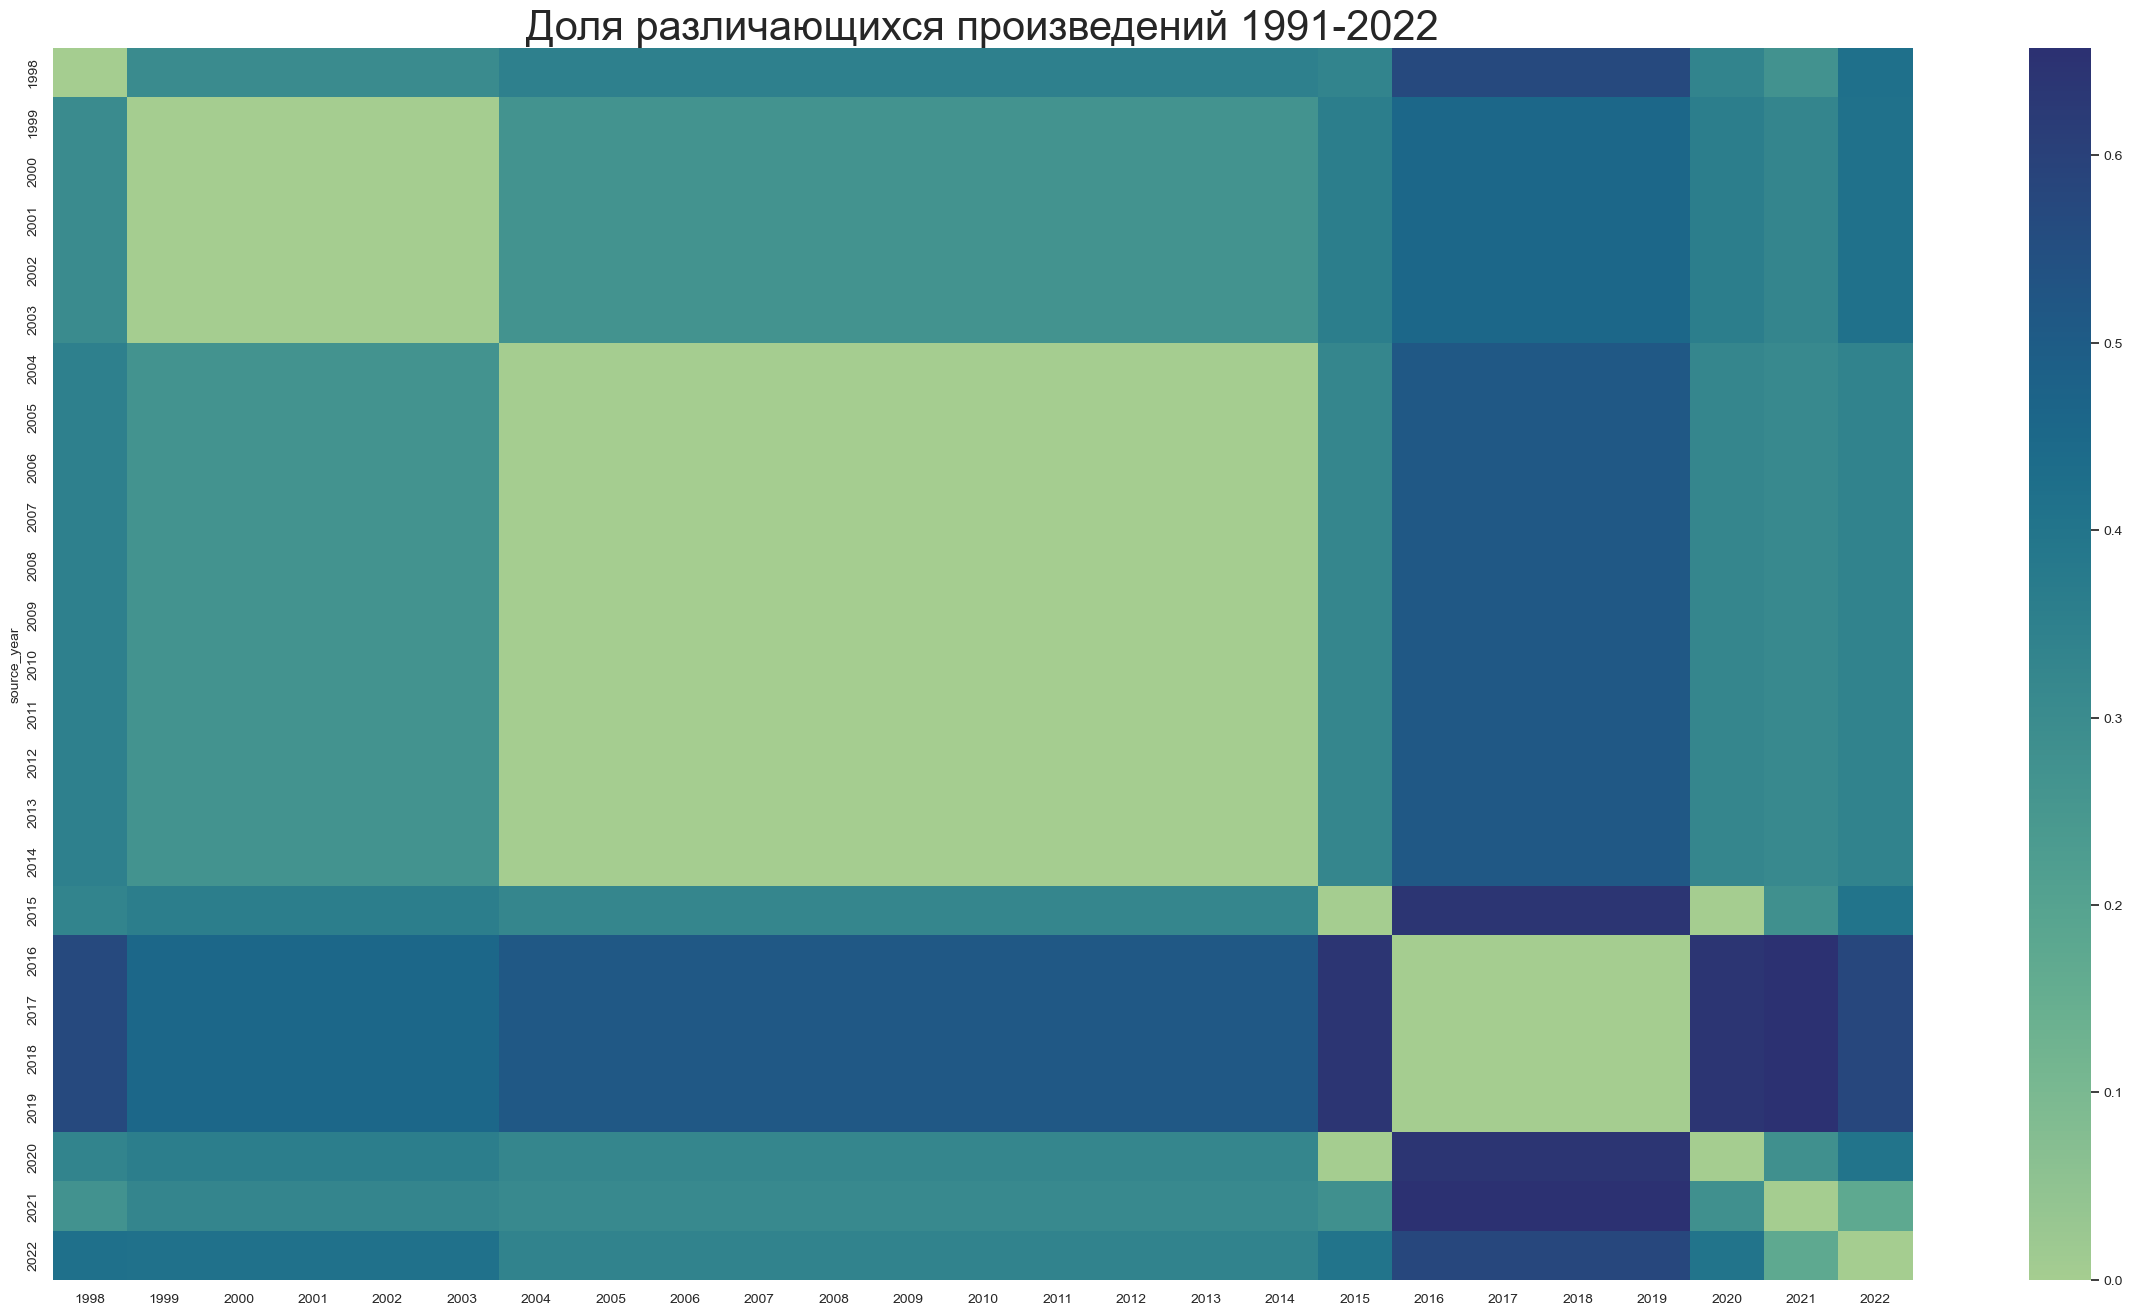

In [164]:
for i in sorted_pivot_df_after.columns:
    sorted_pivot_df_after[i] = sorted_pivot_df_after[i].apply(lambda x: 1 if x > 0 else 0)
data = {} 
for i in sorted_pivot_df_after.columns:
    data[i] = []
    for j in sorted_pivot_df_after.columns:
        data[i].append(((sorted_pivot_df_after[i] - sorted_pivot_df_after[j])**2).sum()/len(sorted_pivot_df_after[1998]))
dataf1 = pd.DataFrame(data, index = sorted_pivot_df_after.columns)

plt.rcParams['svg.fonttype'] = 'none'
plt.figure(figsize=(30, 16))

plt.title('Доля различающихся произведений 1991-2022', fontsize = 30)


plot = sns.heatmap(dataf1, cmap=cmap)
fig = plot.get_figure()
fig.savefig('1991-2022.svg', format='svg')

In [253]:
sorted_pivot_df_after

source_year,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
all,,,,,,,,,,,,,,,,,,,,,
1 поэтическое произведение литературы последнего десятилетия по выбору Произведения по выбору,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,2.0,...,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1 прозаическое произведение литературы последнего десятилетия по выбору Произведения по выбору,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,2.0,...,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1 произведение героического эпоса народов России во фрагментах по выбору (предлагаемый список произведений является примерным и может варьироваться в разных субъектах Российской Федерации) Гэсэр,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1 произведение героического эпоса народов России во фрагментах по выбору (предлагаемый список произведений является примерным и может варьироваться в разных субъектах Российской Федерации) Джангар,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1 произведение героического эпоса народов России во фрагментах по выбору (предлагаемый список произведений является примерным и может варьироваться в разных субъектах Российской Федерации) Калевала,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Энде М. Произведения по выбору,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN
Эрдман Н.Р. Самоубийца,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN,NaN
Языков Н.М. Произведения по выбору,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,NaN,NaN,NaN,NaN,1.0,1.0,2.0


In [87]:
after.rename(columns={'source_year': 'year'}, inplace=True)

In [88]:
new = pd.concat([df_del, after])

In [89]:
print(df_del.shape, after.shape, new.shape)

(9337, 10) (3910, 19) (13247, 24)


In [90]:
pivot_df1 = new.pivot_table(index='all', columns='year', values='title', aggfunc='count').reset_index()


In [91]:
pivot_df1.columns

Index(['all',  1919,  1922,  1932,  1933,  1934,  1938,  1940,  1941,  1942,
        1944,  1946,  1947,  1948,  1949,  1950,  1951,  1954,  1956,  1957,
        1958,  1959,  1960,  1961,  1964,  1965,  1973,  1974,  1975,  1976,
        1977,  1978,  1979,  1980,  1981,  1982,  1983,  1984,  1985,  1986,
        1987,  1988,  1991,  1998,  1999,  2004,  2015,  2016,  2020,  2021,
        2022],
      dtype='object', name='year')

In [92]:
for i in range(1919, 1992):
    if i not in pivot_df1.columns:
        pivot_df1[i] = 0
        
for i in range(1998, 2022):
    if i not in pivot_df1.columns:
        pivot_df1[i] = pivot_df1[i-1]

In [93]:
pivot_df1.set_index('all', inplace = True)

In [94]:
sorted_pivot_df = pivot_df1.reindex(sorted(pivot_df1.columns), axis=1)

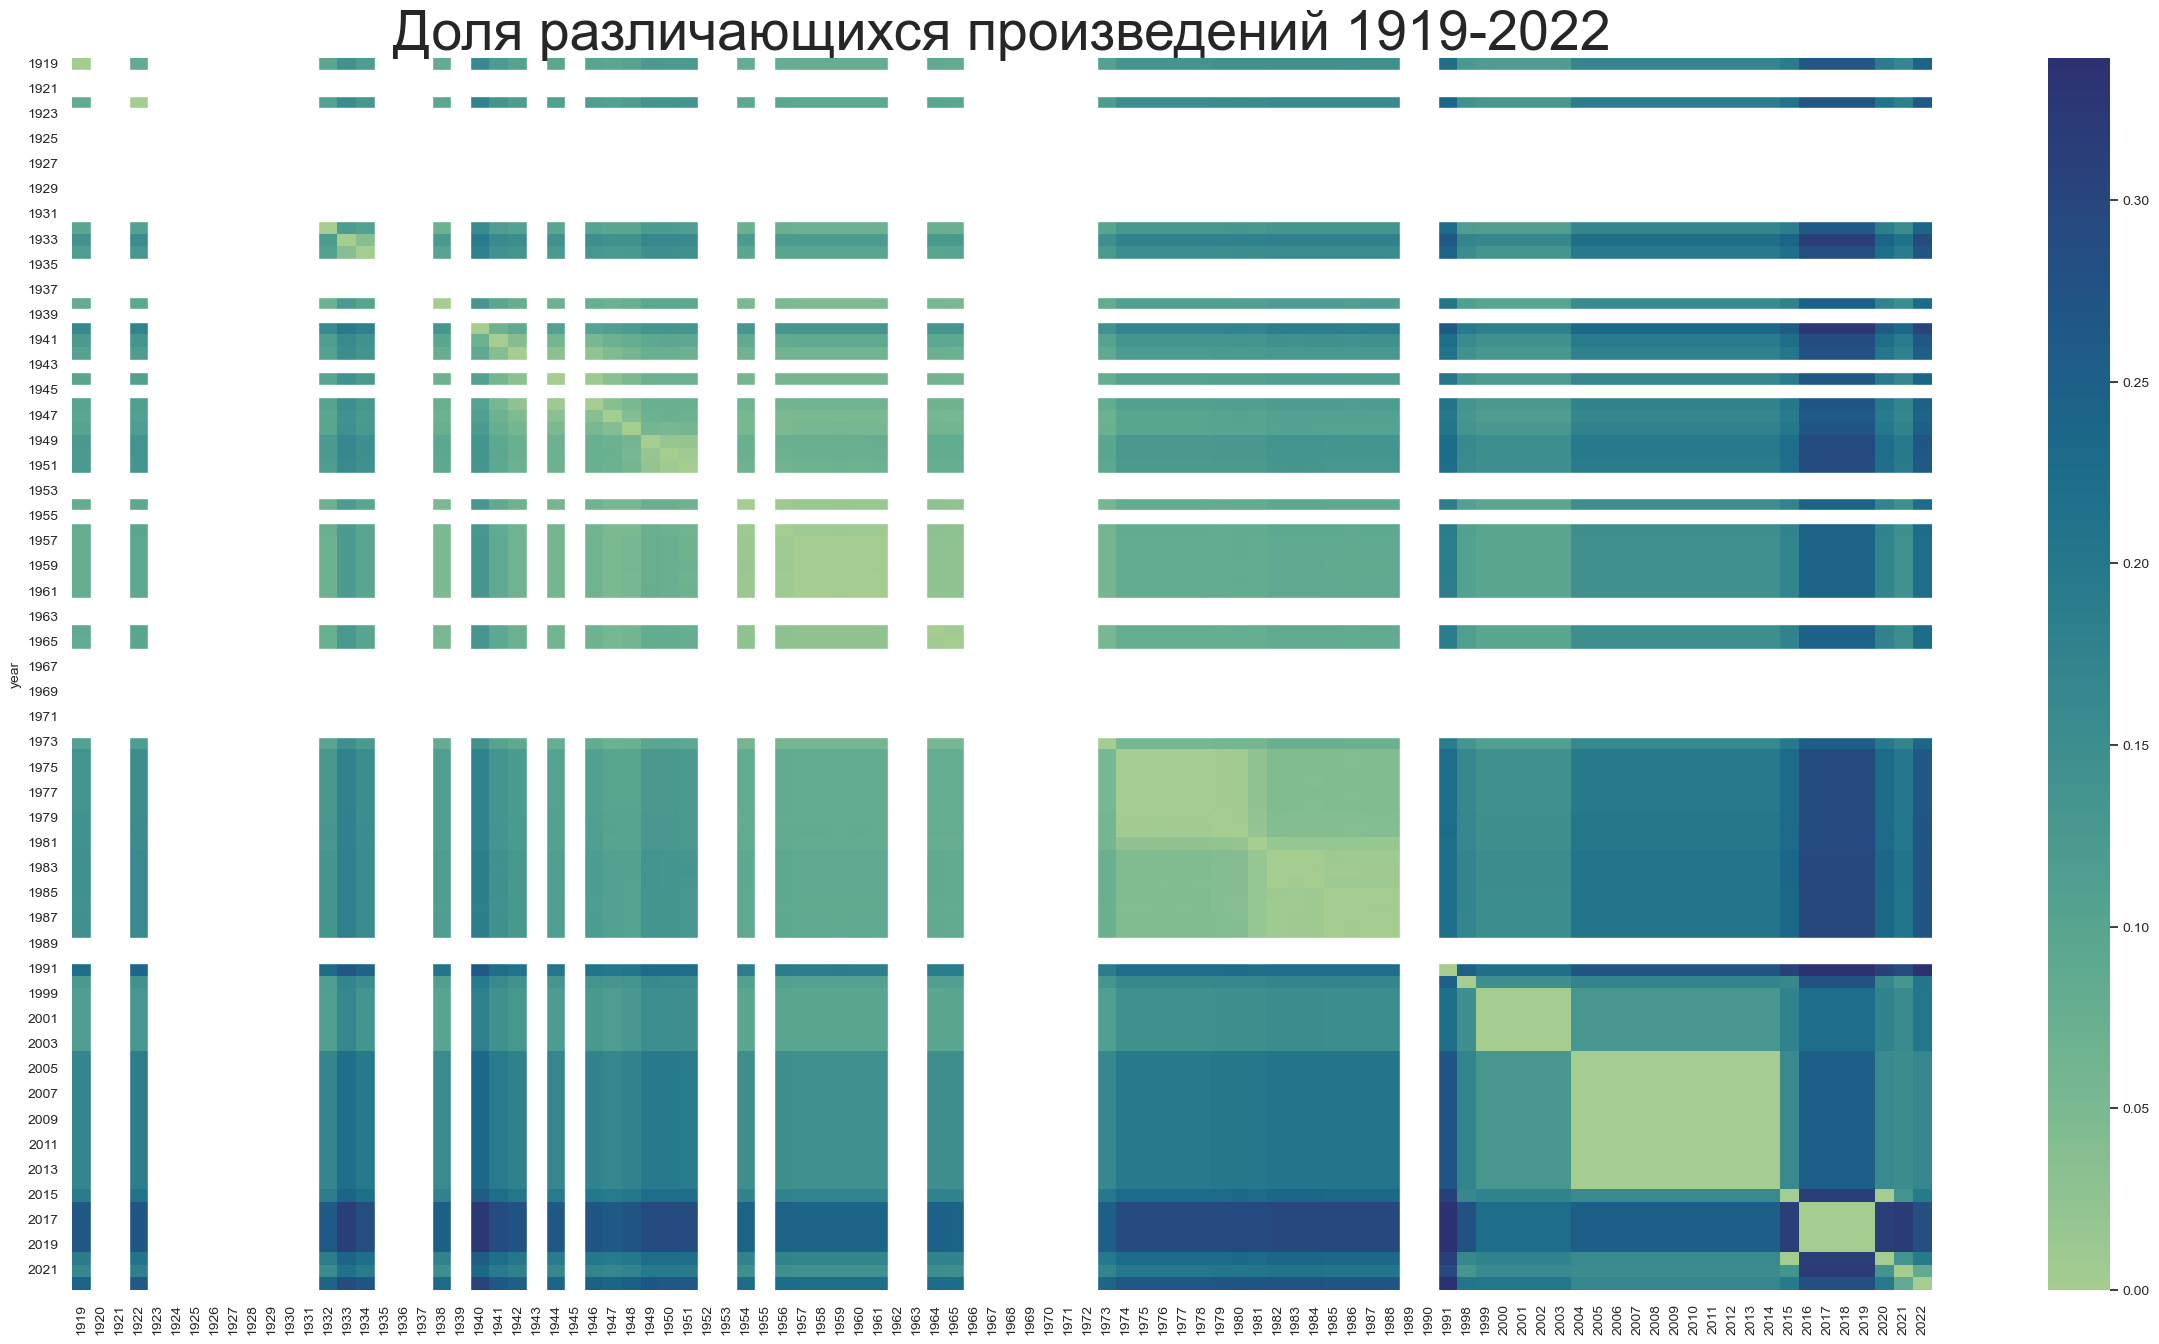

In [165]:
for i in sorted_pivot_df.columns:
    sorted_pivot_df[i] = sorted_pivot_df[i].apply(lambda x: 1 if x > 0 else 0)
data = {} 
for i in sorted_pivot_df.columns:
    data[i] = []
    for j in sorted_pivot_df.columns:
        data[i].append(((sorted_pivot_df[i] - sorted_pivot_df[j])**2).sum()/len(sorted_pivot_df[1919]))
dataf2 = pd.DataFrame(data, index = sorted_pivot_df.columns)


plt.rcParams['svg.fonttype'] = 'none'
plt.figure(figsize=(30, 16))

plt.title('Доля различающихся произведений 1919-2022', fontsize = 40)

plot = sns.heatmap(dataf2, cmap=cmap)
ax = plot.axes

for i in range(len(nach)):
    x_start = nach[i] - 1919  
    x_end = end[i] - 1919    
    ax.axvspan(x_start, x_end, color='white', alpha=1)

for i in range(len(nach)):
    y_start = nach[i] - 1919  
    y_end = end[i] - 1919    
    ax.axhspan(y_start, y_end, color='white', alpha=1)
    
fig = plot.get_figure()
fig.savefig('1919-2022.svg', format='svg')

In [85]:
nach

[1920, 1923, 1935, 1939, 1943, 1945, 1952, 1955, 1962, 1966, 1989]

In [323]:
dataf2

,1919,1920,1921,1922,1923,1924,1925,1926,1927,1928,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
year,,,,,,,,,,,,,,,,,,,,,
1919,0.000000,0.060038,0.060038,0.083677,0.060038,0.060038,0.060038,0.060038,0.060038,0.060038,...,0.169231,0.169231,0.190619,0.267167,0.267167,0.267167,0.267167,0.190619,0.165854,0.244278
1920,0.060038,0.000000,0.000000,0.071670,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.130206,0.130206,0.148593,0.222139,0.222139,0.222139,0.222139,0.148593,0.122326,0.206754
1921,0.060038,0.000000,0.000000,0.071670,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.130206,0.130206,0.148593,0.222139,0.222139,0.222139,0.222139,0.148593,0.122326,0.206754
1922,0.083677,0.071670,0.071670,0.000000,0.071670,0.071670,0.071670,0.071670,0.071670,0.071670,...,0.186116,0.186116,0.206754,0.272795,0.272795,0.272795,0.272795,0.206754,0.182739,0.261163
1923,0.060038,0.000000,0.000000,0.071670,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.130206,0.130206,0.148593,0.222139,0.222139,0.222139,0.222139,0.148593,0.122326,0.206754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018,0.267167,0.222139,0.222139,0.272795,0.222139,0.222139,0.222139,0.222139,0.222139,0.222139,...,0.251032,0.251032,0.312946,0.000000,0.000000,0.000000,0.000000,0.312946,0.320450,0.282552
2019,0.267167,0.222139,0.222139,0.272795,0.222139,0.222139,0.222139,0.222139,0.222139,0.222139,...,0.251032,0.251032,0.312946,0.000000,0.000000,0.000000,0.000000,0.312946,0.320450,0.282552
2020,0.190619,0.148593,0.148593,0.206754,0.148593,0.148593,0.148593,0.148593,0.148593,0.148593,...,0.158724,0.158724,0.000000,0.312946,0.312946,0.312946,0.312946,0.000000,0.137336,0.195497


In [311]:
((dataf1 - dataf2) > 0)

,1919,1920,1921,1922,1923,1924,1925,1926,1927,1928,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
1919,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1920,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1921,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1922,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1923,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2019,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2020,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,True
2021,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,False,False,False,True,False,True


stacked bar charts

In [143]:
cent = pd.read_excel('Литературный канон.xlsx', sheet_name = 'Произведения каких веков мы про')

In [144]:
cent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 9 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Год                                             104 non-null    int64  
 1   Процент литературы 20 века                      104 non-null    float64
 2   Процент литературы 19 века                      104 non-null    object 
 3   Процент литературы 18 века                      104 non-null    object 
 4   Unnamed: 4                                      0 non-null      float64
 5   Год.1                                           104 non-null    int64  
 6   Процент литературы 20 века среди отечественной  104 non-null    float64
 7   Процент литературы 19 века среди отечественной  104 non-null    object 
 8   Процент литературы 18 века среди отечественной  104 non-null    object 
dtypes: float64(3), int64(2), object(4)
memory us

In [149]:
cent = cent.iloc[:, 0:4].set_index('Год')
cent

,Процент литературы 20 века,Процент литературы 19 века,Процент литературы 18 века
Год,,,
1919,8.036,"78,571","13,393"
1920,0.000,0,0
1921,0.000,0,0
1922,10.778,"86,228","2,994"
1923,0.000,0,0
...,...,...,...
2018,50.185,"47,97","1,845"
2019,50.000,"48,148","1,852"
2020,50.000,"48,148","1,852"


In [124]:
cent.info()

<class 'pandas.core.frame.DataFrame'>
Index: 104 entries, 1919 to 2022
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Процент литературы 20 века  104 non-null    float64
 1   Процент литературы 19 века  104 non-null    object 
 2   Процент литературы 18 века  104 non-null    object 
dtypes: float64(1), object(2)
memory usage: 3.2+ KB


In [150]:
cent['Процент литературы 19 века'] = cent['Процент литературы 19 века'].astype('str')
cent['Процент литературы 19 века'] = cent['Процент литературы 19 века'].apply(lambda x: x.replace(',', '.'))

cent['Процент литературы 18 века'] = cent['Процент литературы 19 века'].astype('str')
cent['Процент литературы 18 века'] = cent['Процент литературы 19 века'].apply(lambda x: x.replace(',', '.'))

cent['Процент литературы 19 века'] = cent['Процент литературы 19 века'].astype('float')
cent['Процент литературы 18 века'] = cent['Процент литературы 19 века'].astype('float')

cent.info()

<class 'pandas.core.frame.DataFrame'>
Index: 104 entries, 1919 to 2022
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Процент литературы 20 века  104 non-null    float64
 1   Процент литературы 19 века  104 non-null    float64
 2   Процент литературы 18 века  104 non-null    float64
dtypes: float64(3)
memory usage: 3.2 KB


In [ ]:
## поменять фон

In [151]:
cent

,Процент литературы 20 века,Процент литературы 19 века,Процент литературы 18 века
Год,,,
1919,8.036,78.571,78.571
1920,0.000,0.000,0.000
1921,0.000,0.000,0.000
1922,10.778,86.228,86.228
1923,0.000,0.000,0.000
...,...,...,...
2018,50.185,47.970,47.970
2019,50.000,48.148,48.148
2020,50.000,48.148,48.148


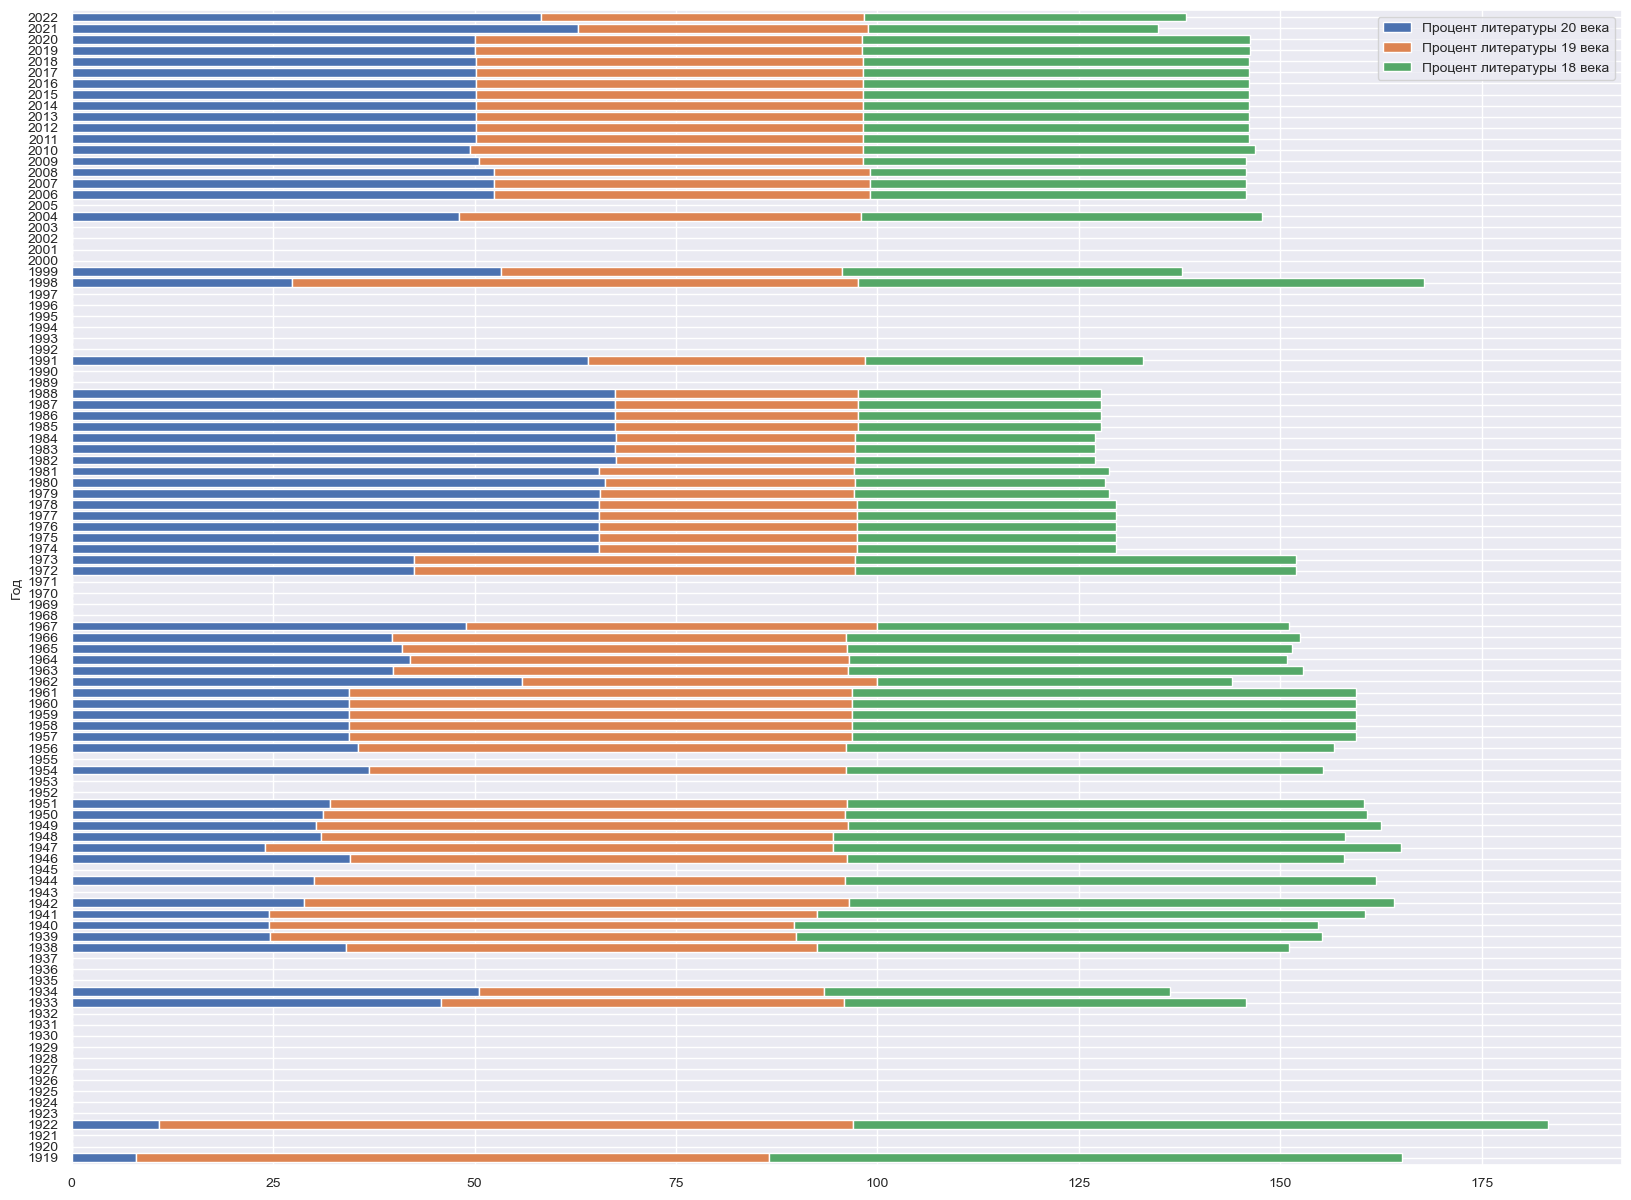

In [162]:
sns.set()

def set_sizes(fig_size:tuple[int,int]=(9, 6), font_size:int=10):
    plt.rcParams["figure.figsize"] = fig_size
    plt.rcParams["font.size"] = font_size
    plt.rcParams["xtick.labelsize"] = font_size
    plt.rcParams["ytick.labelsize"] = font_size
    plt.rcParams["axes.labelsize"] = font_size
    plt.rcParams["axes.titlesize"] = font_size
    plt.rcParams["legend.fontsize"] = font_size
    
set_sizes((20,15), 10)


ax = cent.plot.barh(stacked=True, width=0.8, align='center')


# Отображаем график
plt.show()

In [147]:
cent.loc[1922]

KeyError: 1922